In [7]:
!pip install nltk


[notice] A new release of pip is available: 23.1.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install scikit-learn


[notice] A new release of pip is available: 23.1.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
!pip install wordcloud


[notice] A new release of pip is available: 23.1.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
!pip install tensorflow

In [21]:
conda create -n tf310 python=3.10 -y
conda activate tf310

pip install --upgrade pip setuptools wheel
pip install "tensorflow==2.15.0" ipykernel
python -m ipykernel install --user --name tf310 --display-name "Python 3.10 (tf2.15)"

SyntaxError: invalid syntax (689694180.py, line 1)

In [12]:
python.exe -m pip install --upgrade pip

SyntaxError: invalid syntax (842801469.py, line 1)

In [3]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords  #on in for with of
from nltk.stem.porter import PorterStemmer  #loving loved ~ love
import sklearn
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer #loved= [0,0]
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D


In [4]:
import sns 

ModuleNotFoundError: No module named 'sns'

In [4]:
fake= pd.read_csv('fake.csv')

In [5]:
true= pd.read_csv('true.csv')

In [6]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [7]:
fake.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [8]:
fake['subject'].value_counts()

subject
News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: count, dtype: int64

<Axes: xlabel='subject', ylabel='count'>

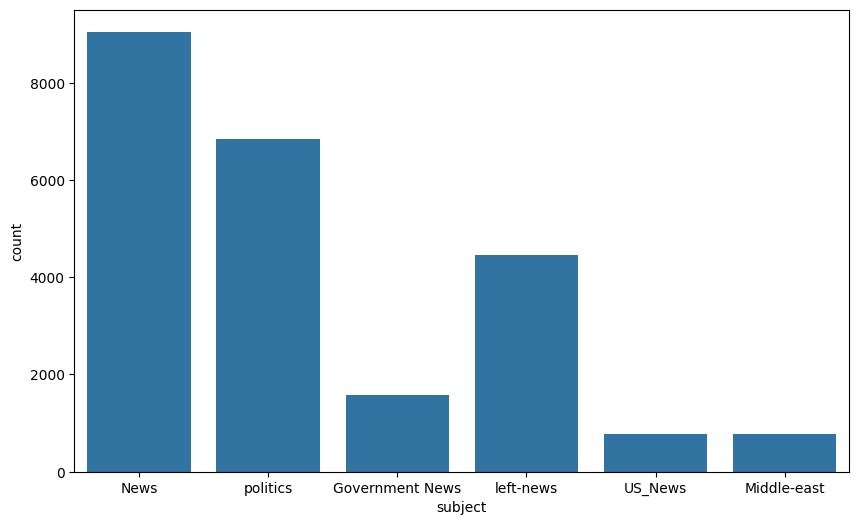

In [9]:
plt.figure(figsize=(10,6))
sns.countplot(x='subject',data=fake)

In [10]:
fake['text'].tolist()

['Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t e

In [11]:
text=' '.join(fake['text'].tolist())

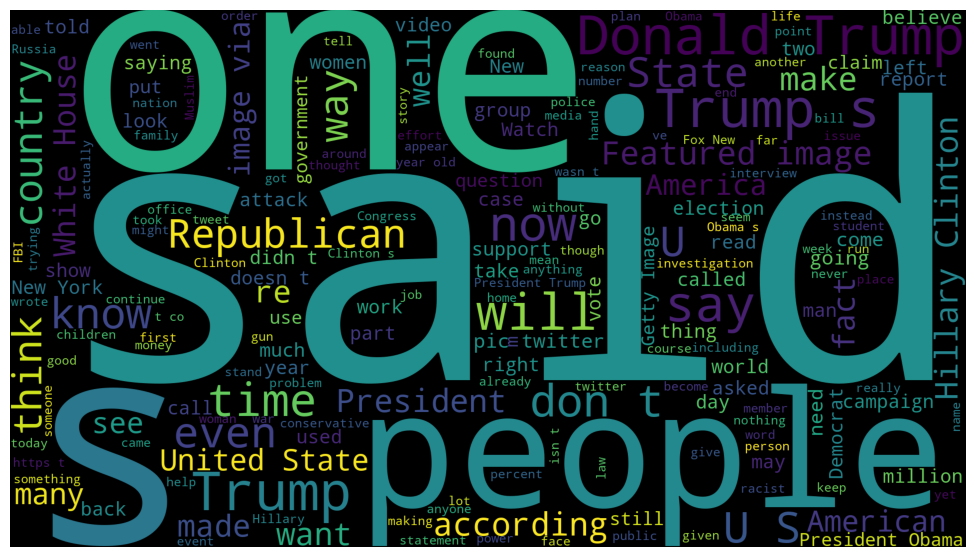

In [12]:
wordcloud= WordCloud(width=1920, height=1080).generate(text)
fig= plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()

In [13]:
real= pd.read_csv('true.csv')

In [14]:
text=' '.join(real['text'].tolist())

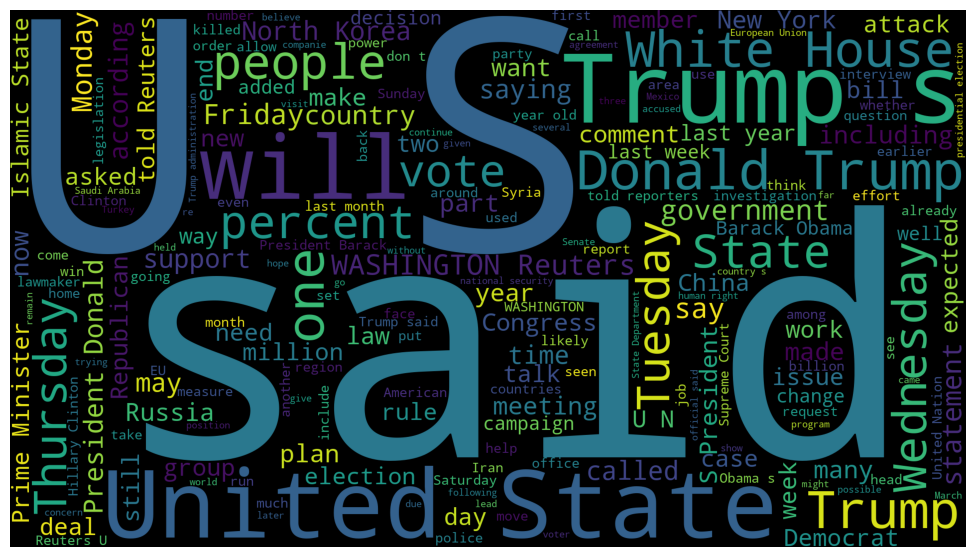

In [15]:
wordcloud= WordCloud(width=1920, height=1080).generate(text)
fig= plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()

In [16]:
#stemming
ps=PorterStemmer()
stop_words= set(stopwords.words('english'))
def stemming(content):
    st_cont= re.sub('[^a-zA-Z]',' ',content)
    st_cont= st_cont.lower()
    st_cont= st_cont.split()
    st_cont=[ps.stem(word) for word in st_cont if not word in stop_words]
    st_cont=' '.join(st_cont)
    return st_cont

In [17]:
real.sample(5)

,title,text,subject,date
5143,"'Green' funds flush with new cash, challenges ...",NEW YORK (Reuters) - Environmentally conscious...,politicsNews,"March 6, 2017"
6379,"Trump, tech tycoons talk overhaul of H1B visas",NEW YORK/SAN FRANCISCO (Reuters) - President-...,politicsNews,"January 12, 2017"
17378,Iraqi forces capture North Oil Co. from Kurdis...,"BAGHDAD/KIRKUK, Iraq (Reuters) - Iraqi on Mond...",worldnews,"October 16, 2017"
20228,Five crew missing after dredger collides with ...,SINGAPORE (Reuters) - Five crew members of a D...,worldnews,"September 13, 2017"
6739,Factbox: Trump fills top jobs for his administ...,(Reuters) - U.S. President-elect Donald Trump ...,politicsNews,"December 13, 2016"


In [18]:
unknown_publishers=[]
for index, row in enumerate(real.text.values):
 try:
    record= row.split('-',maxsplit=1)
    record[1]
    assert(len(record[0])<120)
 except:
    unknown_publishers.append(index)
    

In [19]:
len(unknown_publishers)

222

In [20]:
real.iloc[unknown_publishers].text

7        The following statements were posted to the ve...
8        The following statements were posted to the ve...
12       The following statements were posted to the ve...
13       The following statements were posted to the ve...
14        (In Dec. 25 story, in second paragraph, corre...
                               ...                        
20135     (Story corrects to million from billion in pa...
20500     (This Sept 8 story corrects headline, clarifi...
20667     (Story refiles to add dropped word  not , in ...
21246     (Story corrects third paragraph to show Mosul...
21339     (Story corrects to fix spelling in paragraph ...
Name: text, Length: 222, dtype: object

In [21]:
real.iloc[8970]

title      Graphic: Supreme Court roundup
text                                     
subject                      politicsNews
date                       June 16, 2016 
Name: 8970, dtype: object

In [22]:
real= real.drop(8970, axis=0)

In [23]:
publisher= []
tmp_text =[]

for index, row in enumerate(real.text.values):
   if index in unknown_publishers:
      tmp_text.append(row)
      publisher.append('Unknown')

   else: 
      record= row.split('-',maxsplit=1)
      publisher.append(record[0].strip())
      tmp_text.append(record[1].strip())

In [24]:
real['publisher']= publisher
real['text']= tmp_text

In [25]:
real.head()

,title,text,subject,date,publisher
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",WASHINGTON (Reuters)
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",WASHINGTON (Reuters)
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",SEATTLE/WASHINGTON (Reuters)


In [26]:
real.shape

(21416, 5)

In [27]:
empty_fake_index=[index for index,text in enumerate(fake.text.tolist()) if str(text).strip()==""]

In [28]:
fake.iloc[empty_fake_index]

,title,text,subject,date
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017"
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017"
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017"
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017"
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017"
...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"


In [29]:
real['text']= real['title']+ " " +real['text']
fake['text']= fake['title']+ " " +fake['text']

In [30]:
real['text']= real['text'].apply(lambda x: str(x).lower())
fake['text']= fake['text'].apply(lambda x: str(x).lower())

In [31]:
real['class']=1
fake['class']=0

In [32]:
real.columns


Index(['title', 'text', 'subject', 'date', 'publisher', 'class'], dtype='object')

In [33]:
real= real[['text','class']]
fake= fake[['text','class']]

In [34]:
pip install --upgrade pandas

Note: you may need to restart the kernel to use updated packages.


In [35]:
data = pd.concat([real, fake], ignore_index=True)

In [36]:
data.sample(5)

,text,class
3669,trump's fbi comments to russians were aimed at...,1
29301,apparently the speaker of the house is now ta...,0
24945,texas lawmaker files crucial bill that could ...,0
10504,republican kasich: presidential contests will ...,1
341,"house, senate republicans face challenge over ...",1


In [37]:
!pip install spacy==3.7.6
!python -m spacy download en_core_web_sm==3.7.1
!pip install nltk==3.9.1
!pip install beautifulsoup4==3.2.2
!pip install textblob==0.18.0.post0
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall


[x] No compatible package found for 'en_core_web_sm==3.7.1' (spaCy
v3.7.6)



ERROR: Ignored the following yanked versions: 4.13.0
ERROR: Could not find a version that satisfies the requirement beautifulsoup4==3.2.2 (from versions: 4.0.1, 4.0.2, 4.0.3, 4.0.4, 4.0.5, 4.1.0, 4.1.1, 4.1.2, 4.1.3, 4.2.0, 4.2.1, 4.3.0, 4.3.1, 4.3.2, 4.4.0, 4.4.1, 4.5.0, 4.5.1, 4.5.2, 4.5.3, 4.6.0, 4.6.1, 4.6.2, 4.6.3, 4.7.0, 4.7.1, 4.8.0, 4.8.1, 4.8.2, 4.9.0, 4.9.1, 4.9.2, 4.9.3, 4.10.0, 4.11.0, 4.11.1, 4.11.2, 4.12.0, 4.12.1, 4.12.2, 4.12.3, 4.13.0b2, 4.13.0b3, 4.13.1, 4.13.2, 4.13.3, 4.13.4, 4.13.5, 4.14.0, 4.14.1, 4.14.2)
ERROR: No matching distribution found for beautifulsoup4==3.2.2


  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to c:\users\stanzin angmo\appdata\local\temp\pip-req-build-l56c5dr5
  Resolved https://github.com/laxmimerit/preprocess_kgptalkie.git to commit 0f56a6502679f6750b7f0ffed98f590d1f0246bd
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for preprocess_kgptalkie: filename=preprocess_kgptalkie-0.11-py3-none-any.whl size=8329 sha256=ef1bebe08c086190931dccdcfc1515a99c214769a273a7eaf9b5a710e5152d67
  Stored in directory: C:\Users\Stanzin Angmo\AppData\Local\Temp\pip-ephem-wheel-cache-ttizdog3\wheels\74\fe\05\0d013c54ae5e4afb77c6c480378063827c84f57ea5f554e072
Successfully built preprocess_kgptalkie
  Attempting uninstall: preprocess_kgptalkie
    Found existing installation: preprocess_kgptalkie 0.11
    Uninstalling preprocess_kgptalkie-0.11:
      Successfully uninstalled preprocess_kgptalkie-0.11


  Running command git clone --filter=blob:none --quiet https://github.com/laxmimerit/preprocess_kgptalkie.git 'C:\Users\Stanzin Angmo\AppData\Local\Temp\pip-req-build-l56c5dr5'
  DEPRECATION: Building 'preprocess_kgptalkie' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'preprocess_kgptalkie'. Discussion can be found at https://github.com/pypa/pip/issues/6334


In [38]:
#nstalls NLTK (Natural Language Toolkit) — one of the oldest and most popular Python NLP libraries.
#You’ll use it for:

#Stopword removal

#Tokenization

#Lemmatization

#Basic text cleaning

In [39]:
!pip install googletrans==4.0.0-rc1

In [40]:
from googletrans import Translator

In [41]:
!pip install lxml

In [42]:
import spacy
nlp = spacy.load("en_core_web_sm")
print("spaCy model OK")

import preprocess_kgptalkie as ps
print("preprocess_kgptalkie OK:", [x for x in dir(ps) if "clean" in x or "extract" in x])

# try the cleaner (repo exposes clean_text / get_clean depending on version)
sample = "Hello!! Email me at a@b.com. Visit https://x.y"
if hasattr(ps, "clean_text"):
    print(ps.clean_text(sample))
elif hasattr(ps, "get_clean"):
    print(ps.get_clean(sample))

spaCy model OK
preprocess_kgptalkie OK: ['clean_text', 'extract_features']
hello email I at   visit


In [43]:
import preprocess_kgptalkie as ps

In [44]:
data['text']= data['text'].apply(lambda x: ps.remove_special_chars(x))

In [45]:
!pip install gensim


In [46]:
import gensim

In [47]:
y= data['class'].values

In [48]:
X= [d.split() for d in data['text'].tolist()]

In [49]:
DIM=100
w2v_model= gensim.models.Word2Vec(sentences=X, vector_size=DIM, window=10, min_count=1)

In [50]:
len(w2v_model.wv.key_to_index)

230854

In [51]:
w2v_model.wv['love']

array([ 2.171141  ,  1.1194881 ,  0.83293784, -3.5715117 ,  3.2608166 ,
        1.1288825 ,  0.24290408,  1.7313356 , -1.2276284 ,  3.8879733 ,
       -3.5771334 , -0.68248016, -4.9674134 ,  0.2701867 ,  0.2096262 ,
       -1.669623  , -1.2526587 ,  1.6832045 ,  0.4909642 , -1.9561698 ,
       -4.9375987 , -1.8169149 , -1.234273  ,  3.2429562 , -1.3712393 ,
        5.415632  ,  2.5571086 , -0.829788  , -1.188253  , -1.5159776 ,
        2.509357  , -1.3659432 ,  1.2661766 ,  0.65056473, -1.6798013 ,
        2.5738797 ,  2.5886338 , -0.47049794,  0.10032508, -2.220932  ,
       -1.09342   , -4.564738  , -4.1818066 , -0.97269636, -1.8994364 ,
       -1.5984293 ,  3.7657604 , -2.8241012 ,  0.66334385, -1.2704426 ,
        0.47398162,  3.205378  ,  4.629984  , -2.767714  , -0.5566269 ,
       -1.1133239 , -2.3975844 , -1.471095  , -2.0794358 , -1.7322224 ,
       -1.825965  , -4.2464714 , -0.53247726, -0.51999354,  1.830834  ,
       -0.9377437 ,  2.147159  ,  2.3742893 ,  0.21637094,  1.37

In [52]:
w2v_model.wv.most_similar('india')

[('pakistan', 0.7360889911651611),
 ('malaysia', 0.6769219636917114),
 ('china', 0.6332200169563293),
 ('norway', 0.6125059127807617),
 ('australia', 0.6065054535865784),
 ('indian', 0.6055608987808228),
 ('beijings', 0.6022716164588928),
 ('asia', 0.5941470265388489),
 ('thailand', 0.5839472413063049),
 ('modi', 0.5769731998443604)]

In [53]:
tokenizer= Tokenizer()
tokenizer.fit_on_texts(X)

In [54]:
X= tokenizer.texts_to_sequences(X)

In [64]:
tokenizer.word_index

{'the': 1,
 'to': 2,
 'of': 3,
 'a': 4,
 'and': 5,
 'in': 6,
 'that': 7,
 'on': 8,
 'for': 9,
 's': 10,
 'is': 11,
 'he': 12,
 'said': 13,
 'trump': 14,
 'it': 15,
 'with': 16,
 'was': 17,
 'as': 18,
 'his': 19,
 'by': 20,
 'has': 21,
 'be': 22,
 'have': 23,
 'not': 24,
 'from': 25,
 'this': 26,
 'at': 27,
 'are': 28,
 'who': 29,
 'us': 30,
 'an': 31,
 'they': 32,
 'i': 33,
 'but': 34,
 'we': 35,
 'would': 36,
 'president': 37,
 'about': 38,
 'will': 39,
 'their': 40,
 'had': 41,
 'you': 42,
 't': 43,
 'been': 44,
 'were': 45,
 'people': 46,
 'more': 47,
 'or': 48,
 'after': 49,
 'which': 50,
 'she': 51,
 'her': 52,
 'one': 53,
 'if': 54,
 'its': 55,
 'out': 56,
 'all': 57,
 'what': 58,
 'state': 59,
 'when': 60,
 'new': 61,
 'also': 62,
 'up': 63,
 'there': 64,
 'over': 65,
 'no': 66,
 'house': 67,
 'donald': 68,
 'our': 69,
 'states': 70,
 'clinton': 71,
 'obama': 72,
 'government': 73,
 'can': 74,
 'just': 75,
 'him': 76,
 'so': 77,
 'than': 78,
 'republican': 79,
 'other': 80,
 'so

In [65]:
[len(x) for x in X]

[753,
 628,
 464,
 382,
 860,
 599,
 543,
 139,
 103,
 74,
 404,
 623,
 104,
 188,
 359,
 450,
 697,
 181,
 394,
 218,
 527,
 910,
 415,
 364,
 693,
 375,
 350,
 270,
 75,
 434,
 177,
 228,
 95,
 337,
 1113,
 839,
 554,
 469,
 466,
 99,
 180,
 324,
 582,
 72,
 409,
 365,
 617,
 358,
 85,
 403,
 81,
 962,
 656,
 418,
 399,
 384,
 220,
 162,
 389,
 616,
 489,
 244,
 849,
 370,
 628,
 649,
 1302,
 430,
 398,
 142,
 214,
 1108,
 75,
 74,
 588,
 850,
 758,
 788,
 347,
 694,
 482,
 416,
 84,
 419,
 127,
 1383,
 100,
 458,
 358,
 85,
 62,
 108,
 656,
 350,
 228,
 80,
 322,
 429,
 347,
 561,
 415,
 854,
 92,
 333,
 136,
 198,
 408,
 91,
 1124,
 995,
 387,
 115,
 73,
 437,
 598,
 88,
 80,
 638,
 252,
 254,
 313,
 202,
 163,
 292,
 392,
 428,
 401,
 717,
 618,
 282,
 104,
 87,
 85,
 79,
 74,
 509,
 407,
 249,
 723,
 767,
 233,
 420,
 433,
 545,
 420,
 365,
 310,
 831,
 686,
 89,
 99,
 108,
 360,
 87,
 58,
 294,
 225,
 285,
 370,
 108,
 462,
 580,
 943,
 1067,
 263,
 462,
 464,
 499,
 89,
 537,
 

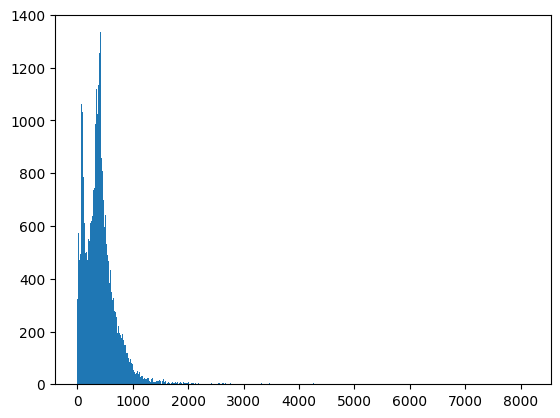

In [66]:
plt.hist([len(x) for x in X], bins=700)
plt.show()

In [67]:
nos= np.array([len(x) for x in X])
len(nos[nos>1000])

1584

In [68]:
vocab_size= len(tokenizer.word_index) +1

In [69]:
def get_weight_matrix(model):
    weight_matrix= np.zeros((vocab_size, DIM))

    for word, i in vocab.items():
         if word in model.wv:                   
          weight_matrix[i]= model.wv[word]
    return weight_matrix

In [70]:
vocab = tokenizer.word_index

In [71]:
embedding_vectors= get_weight_matrix(w2v_model)

In [72]:
maxlen = 300

In [73]:
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [74]:
model = Sequential()    
model.add(Embedding(vocab_size, output_dim=DIM, weights=[embedding_vectors], input_length=maxlen, trainable=False))
model.add(LSTM(units=128))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [75]:
#[Text → Word indices] 
#→ Embedding (Word2Vec meaning) 
#→ LSTM (context + sequence understanding) 
#→ Dense (classification output)

In [76]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 100)          23085500  
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 23202877 (88.51 MB)
Trainable params: 117377 (458.50 KB)
Non-trainable params: 23085500 (88.06 MB)
_________________________________________________________________


In [77]:
X_train, X_test, y_train, y_test= train_test_split(X,y)


In [ ]:
model.fit(X_train, y_train, validation_split=0.3, epochs=6)